In [5]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle

sys.path.append("..")
from dm21cm.dm_params import DMParams
import dm21cm.physics as phys

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH
from darkhistory.config import load_data

In [2]:
# phph
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e3, # [eV]
    lifetime = 10**28.821, #[s]
)

In [4]:
# ee
dm_params = DMParams(
    mode = 'decay',
    primary = 'elec_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e26, #[s]
)

In [3]:
# off
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e50, #[s]
)

In [3]:
run_name = 'test_dh'

soln = evolve_DH(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=47.,
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    # cross_check_21cmfast=True,
    # cross_check_21cmfast_tf_version=tf_version,
    # debug_inject_ST_xray=False,
)

pickle.dump(soln, open(f"{os.environ['DM21CM_DIR']}/outputs/dh/{run_name}_soln.p", 'wb'))

100%|██████████| 534/534 [01:30<00:00,  5.88it/s]


In [7]:
import matplotlib.pyplot as plt

In [14]:
save_dict = {
    'z' : soln['rs'] - 1,
    'Tk' : soln['Tm']/phys.kB,
    'xHII' : soln['x'][:,0],
    'xHeII' : soln['x'][:,0]/phys.chi,
}

In [15]:
pickle.dump(save_dict, open("dh.p", 'wb'))

In [ ]:
data = pickle.load(open("dh.p", 'rb'))
plt.plot(data['z'], data['Tk']) # [K]

[]

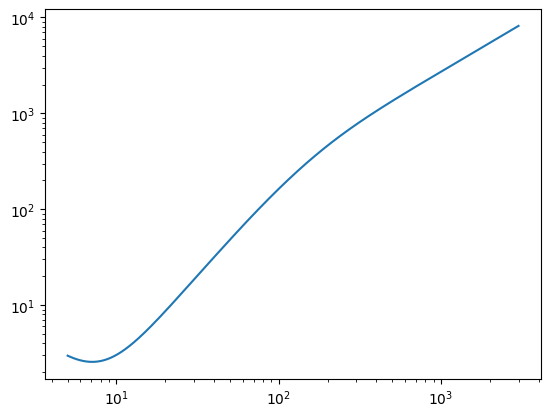

In [9]:
plt.plot(soln['rs'], soln['Tm']/phys.kB)
plt.loglog()